In [2]:
import pandas as pd
#df_train = pd.read_csv("Train.csv")
df_171819= pd.read_csv("171819_DATA.csv")
df_171819.columns

Index(['Unnamed: 0', 'VendorID', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_minutes', 'dropOff_year',
       'dropOff_month', 'dropOff_day', 'dropOff_hour', 'dropOff_minutes',
       'duration', 'speed'],
      dtype='object')

In [3]:
import shap


In [4]:
df_171819=df_171819.drop(['Unnamed: 0'], axis=1)
df_171819.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minutes', 'dropOff_year', 'dropOff_month', 'dropOff_day',
       'dropOff_hour', 'dropOff_minutes', 'duration', 'speed'],
      dtype='object')

In [7]:
df18=df_171819[df_171819['pickup_year']==2018]
df_train= df18
df_test = df_171819[df_171819['pickup_year']==2019]

In [8]:
Y=df_train['total_amount']
X=df_train.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1)

In [9]:
Y_test=df_test['total_amount']
X_test=df_test.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1)

In [10]:
X_test.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minutes,dropOff_year,dropOff_month,dropOff_day,dropOff_hour,dropOff_minutes,duration,speed
16439025,2,1,82,82,1,0.82,2,1.0,2019,1,22,6,16,2019,1,22,6,23,7.0,7.028571
16441025,2,1,82,215,1,6.02,2,1.0,2019,2,12,14,26,2019,2,12,14,45,19.0,19.010526
16441026,2,1,122,191,1,1.00,1,1.0,2019,3,5,22,8,2019,3,5,22,16,8.0,7.500000
16547552,2,1,255,256,1,0.70,2,1.0,2019,1,6,6,51,2019,1,6,6,54,3.0,14.000000
16547553,2,1,255,233,1,5.48,1,1.0,2019,1,6,7,2,2019,1,6,7,19,17.0,19.341176


In [10]:
from sklearn import metrics 
print("Accuracy:",regressor.score(X_test,Y_test))

Accuracy: 0.8842187555198416


[[ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
   3.97372566e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
  -1.18783274e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
  -2.06136373e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
  -1.32064209e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
  -1.88607602e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00381228e-03  0.00000000e+00 ...  0.00000000e+00
   4.79949341e-01  0.00000000e+00]]


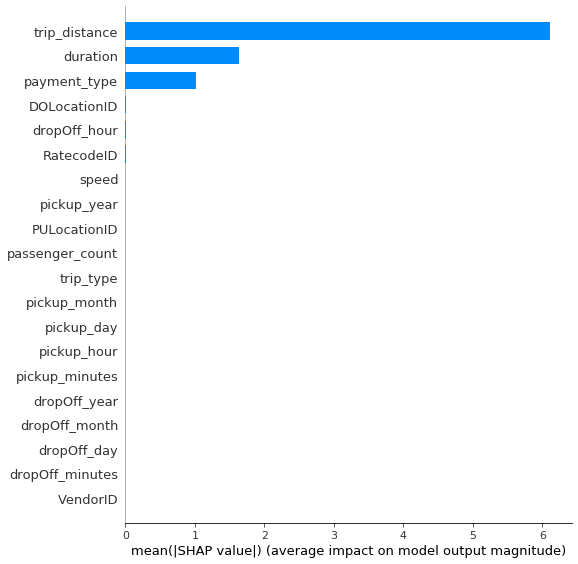

In [11]:
shap_values = shap.TreeExplainer(regressor).shap_values(X)
print(shap_values)
shap.summary_plot(shap_values, X, plot_type="bar")

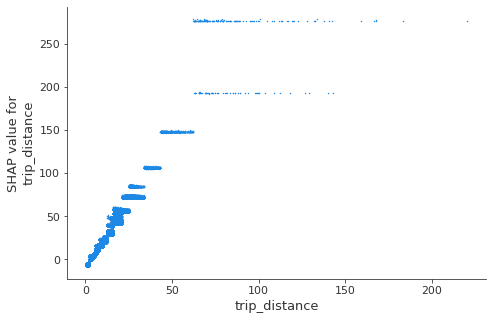

In [13]:
shap.dependence_plot("trip_distance", shap_values, X, interaction_index=None, dot_size=2)

In [13]:
import pickle
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(max_depth=6, random_state=0,n_estimators = 100)
filename = 'shap_model_random.sav'
pickle.dump(random_model,open(filename,'wb'))

In [14]:
random_model.fit(X, Y)
Y_pred = random_model.predict(X_test)


NameError: name 'regressor' is not defined

In [15]:
print("Accuracy:",random_model.score(X_test,Y_test))

Accuracy: 0.8959341742627777


[[ 0.00000000e+00  1.45878039e-02  0.00000000e+00 ...  0.00000000e+00
   7.02771967e-01 -8.74242366e-07]
 [ 0.00000000e+00  1.02083092e-02  0.00000000e+00 ...  0.00000000e+00
  -1.51816245e-02 -3.01029947e-06]
 [ 0.00000000e+00  1.02083092e-02  0.00000000e+00 ...  0.00000000e+00
   6.22466378e-01 -1.23265919e-06]
 ...
 [ 0.00000000e+00  1.02083092e-02  0.00000000e+00 ...  0.00000000e+00
   5.00391253e-01 -3.01029947e-06]
 [ 0.00000000e+00  1.02083092e-02  0.00000000e+00 ...  0.00000000e+00
  -2.09105527e+00 -1.69196954e-06]
 [ 0.00000000e+00  1.02083092e-02  0.00000000e+00 ...  0.00000000e+00
  -1.07059555e+00 -2.60828178e-06]]


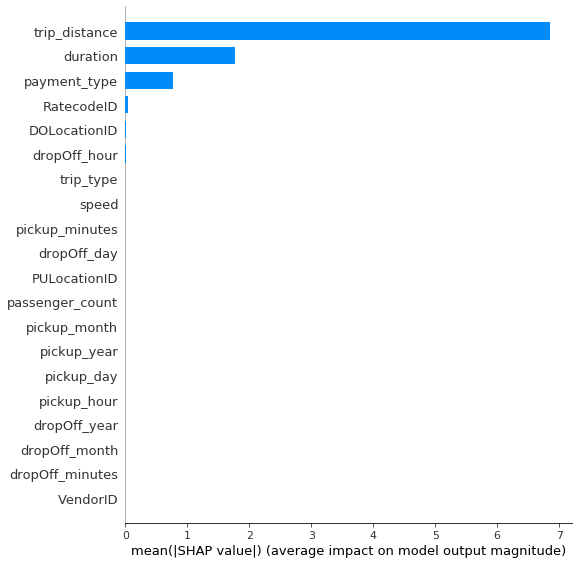

In [16]:
shap_values = shap.TreeExplainer(random_model).shap_values(X)
print(shap_values)
shap.summary_plot(shap_values, X, plot_type="bar")

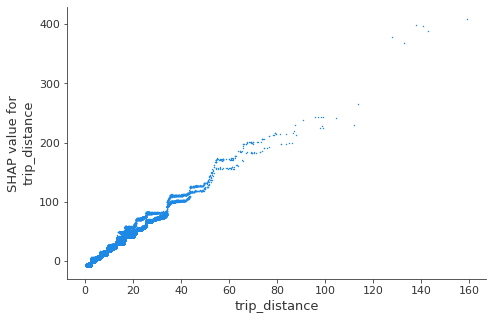

In [17]:
shap.dependence_plot("trip_distance", shap_values, X, interaction_index=None, dot_size=2)